In [97]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import re
import requests
from time import sleep

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import numpy as np
import seaborn as sns

Selenium inexplicably stopped working, so I had to download the source html manually. This is the html for the 2012 senate election page. 

In [15]:
f = open('../mcnulty/data/2012_sentate_votes.html')

In [16]:
html = f.read()

In [34]:
soup = BeautifulSoup(html,'html')

/Users/nickybangs/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/nickybangs/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [35]:
hrefs = []

In [37]:
for s in results.findAll('li'):
    state = s.find('h3').text
    href = s.find(text=re.compile('State Results')).parent['href']
    hrefs.append([state,href])

In [104]:
state_dict = {}

for h in hrefs:
    state = h[0]
    state_dict[state] = {}
    resp = requests.get(h[1])
    soup = BeautifulSoup(resp.text,'html')
    for tb in soup.find('div', {'class': 'state-results-table state-results-micro state-results-#url.race#'}).find('table').findAll('tbody'):
        county = tb.find('th', {'class': 'results-county'}).text
        county = re.split(r'\d*\.\d*%', county)[0].strip()
        state_dict[state][county] = []
        for tr in tb.findAll('tr'):
            party = tr.find('td', {'class': 'results-party'}).text
            percent = float(tr.find('td', {'class': 'results-percentage'}).text.strip('%'))
            pop = int(tr.find('td', {'class': 'results-popular'}).text.strip().replace(',',''))
            state_dict[state][county].append([party,percent,pop])
    sleep(.1)

/Users/nickybangs/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/nickybangs/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [108]:
state_dict['New York']

{'Albany': [['Dem', 75.2, 91385],
  ['GOP', 23.1, 28138],
  ['Grn', 0.8, 999],
  ['Lib', 0.6, 762],
  ['Oth', 0.2, 301]],
 'Allegany': [['GOP', 50.3, 7497],
  ['Dem', 47.9, 7140],
  ['Grn', 0.7, 103],
  ['Lib', 0.6, 85],
  ['Oth', 0.4, 67]],
 'Bronx': [['Dem', 93.0, 275512],
  ['GOP', 6.4, 19046],
  ['Grn', 0.3, 897],
  ['Lib', 0.2, 491],
  ['Oth', 0.2, 447]],
 'Brooklyn': [['Dem', 86.7, 503370],
  ['GOP', 12.0, 69536],
  ['Grn', 0.8, 4555],
  ['Lib', 0.3, 1771],
  ['Oth', 0.2, 1132]],
 'Broome': [['Dem', 65.1, 46415],
  ['GOP', 33.3, 23755],
  ['Lib', 0.7, 485],
  ['Grn', 0.7, 470],
  ['Oth', 0.3, 194]],
 'Cattaraugus': [['Dem', 55.9, 14617],
  ['GOP', 42.4, 11075],
  ['Lib', 0.6, 163],
  ['Oth', 0.6, 147],
  ['Grn', 0.5, 143]],
 'Cayuga': [['Dem', 62.0, 15498],
  ['GOP', 35.2, 8803],
  ['Grn', 1.3, 322],
  ['Oth', 0.8, 205],
  ['Lib', 0.6, 151]],
 'Chautauqua': [['Dem', 57.5, 26781],
  ['GOP', 41.0, 19107],
  ['Lib', 0.6, 291],
  ['Grn', 0.5, 251],
  ['Oth', 0.4, 181]],
 'Chemung': [

In [144]:
m = []
for state in state_dict:
    for county in state_dict[state]:
        m.append([state,county,state_dict[state][county]])
        
df = pd.DataFrame(m)

df.columns = ['state','county','politics']

In [145]:
df.head()

,state,county,politics
0,New York,Schoharie,"[[Dem, 58.9, 6843], [GOP, 39.6, 4598], [Grn, 0..."
1,New York,Allegany,"[[GOP, 50.3, 7497], [Dem, 47.9, 7140], [Grn, 0..."
2,New York,Dutchess,"[[Dem, 65.7, 71838], [GOP, 32.8, 35806], [Lib,..."
3,New York,Saint Lawrence,"[[Dem, 69.8, 22309], [GOP, 28.6, 9149], [Grn, ..."
4,New York,Montgomery,"[[Dem, 64.3, 10217], [GOP, 34.0, 5402], [Oth, ..."


In [114]:
def find_max(l):
    if len(l) == 1:
        return l[0][0]
    percentages = [subl[1] for subl in l]
    i = percentages.index(max(percentages))
    return l[i][0]

In [146]:
df['color'] = df['politics'].apply(find_max)

In [147]:
df.head()

,state,county,politics,color
0,New York,Schoharie,"[[Dem, 58.9, 6843], [GOP, 39.6, 4598], [Grn, 0...",Dem
1,New York,Allegany,"[[GOP, 50.3, 7497], [Dem, 47.9, 7140], [Grn, 0...",GOP
2,New York,Dutchess,"[[Dem, 65.7, 71838], [GOP, 32.8, 35806], [Lib,...",Dem
3,New York,Saint Lawrence,"[[Dem, 69.8, 22309], [GOP, 28.6, 9149], [Grn, ...",Dem
4,New York,Montgomery,"[[Dem, 64.3, 10217], [GOP, 34.0, 5402], [Oth, ...",Dem


Just some book-keeping to label each winner as democrat, republican or independent. 

In [148]:
df['color'] = df['color'].replace('Dem', 'democrat')
df['color'] = df['color'].replace('GOP', 'republican')
df['color'] = df['color'].replace('Lib', 'independent')
df['color'] = df['color'].replace('Grn', 'independent')
df['color'] = df['color'].replace('NPA', 'independent')
df['color'] = df['color'].replace('Ind', 'independent')

In [152]:
df.ix[(df['state']=='Texas') & (df['county']=='De Witt'),'county'] = 'DeWitt'
df.ix[(df['state']=='Texas') & (df['county']=='La Vaca'),'county'] = 'Lavaca'
df.ix[(df['state']=='New Mexico') & (df['county']=='DeBaca'),'county'] = 'De Baca'
df.ix[(df['state']=='Mississippi') & (df['county']=='Jeff Davis'),'county'] = 'Jefferson Davis'
df.ix[(df['state']=='Minnesota') & (df['county']=='Lac Qui Parle'),'county'] = 'Lac qui Parle'
df.ix[(df['state']=='New York') & (df['county']=='Saint Lawrence'),'county'] = 'St. Lawrence'
df.ix[(df['state']=='Missouri') & (df['county']=='St. Louis County'),'county'] = 'St. Louis'
df.ix[(df['state']=='Missouri') & (df['county']=='LaClede'),'county'] = 'Laclede'

In [153]:
df.to_csv('2012_senate_counties.csv')

/Users/nickybangs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


New York New York
New York Kings
New York Richmond


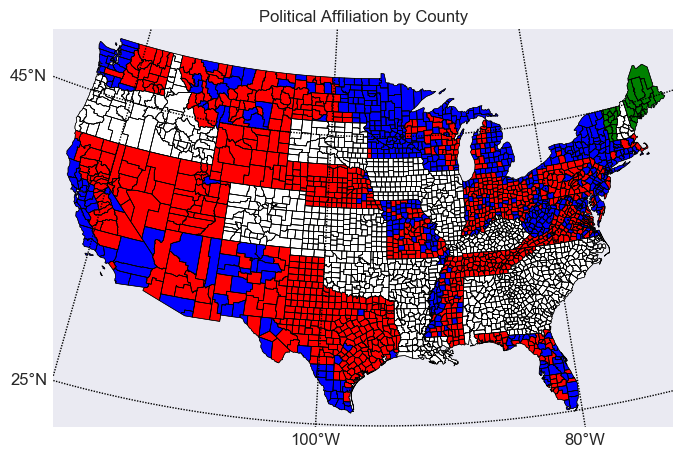

In [154]:
color_dict = {'republican': 'red', 'democrat': 'blue', 'independent': 'green'}

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# lat_1,2 - lon_0 -- center

# county shapefile
shp_info = m.readshapefile('/Users/nickybangs/ds/metis/mcnulty/data/2016-us-election/county_shapefiles/UScounties','counties',drawbounds=True)

countynames = []

for shapedict in m.counties_info:
    try:
        countynames.append([shapedict['STATE_NAME'],shapedict['NAME']])
    except:
        pass

ax = plt.gca()

for nshape,seg in enumerate(m.counties):
    try:
    # if countynames[nshape][0] == 'Louisiana':
    #     appenda = 'Parish'
       # else:
    #     appenda = 'County'
        c = df[df['state']==countynames[nshape][0]][df['county']==str('{}'.format(countynames[nshape][1]))]
        if len(c) > 0:
            col = color_dict[c['color'].iloc[0]]
        else:
            if len(df[df['state']==countynames[nshape][0]]) > 0 and countynames[nshape][0] not in ['Alaska','Hawaii']: 
                print(countynames[nshape][0],countynames[nshape][1])
            col = 'white'
        poly = Polygon(seg,facecolor=col,edgecolor='black')
        ax.add_patch(poly)
    except:
        poly = Polygon(seg,facecolor='w',edgecolor='black')
        ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
plt.title('Political Affiliation by County')
plt.show()